In [1]:
import numpy as np
from dimod import BinaryQuadraticModel
from utils import *
from QUBO_Matrix import *
import pandas as pd



# Create QUBO from the dataset given in excel format and changed to be a csv 
EG: dfsp1.1, dfsp1 dfsp1.1norm\\

The matrix Q contains the upper diagonal matrix representing the problem,

The matrix Q1 contains a sparse matrix in the form of a dictionary,

The object bqm contains the binary quadratic model as Dwave requires,

Offset is the offset of the computation.





Given that the dataset is not in a proper form for now this next cell should be executed as is changhing only the name of the dataset

In [2]:
file_name ='S0_prosumer_test_240912'

In [3]:
T, K, P_k, A, B_a, Q_a, R_vend,R_acqu, Epf, Ecf, E_max, E0, Ek_min, g1, g2, g4,etac, etas, PaT, Pa0, Pvend, Pacqu, Pinc, costk,Eas_max,  Eac_max, Ek_max=parseXml(f"dataset xml/{file_name}.xml", norm_factor = 100)
bqm, Q, offset, Q1=create_QUBO(T, K, P_k, A, B_a, Q_a, R_vend,R_acqu, Epf, Ecf, E_max, E0, Ek_min, g1, g2, g4,etac, etas, PaT, Pa0, Pvend, Pacqu, Pinc, costk,Eas_max,  Eac_max, Ek_max)
Q= to_up_triang(Q)
matrix_to_txt(Q,f'./matrices/{file_name}_100.txt')

<Axes: >

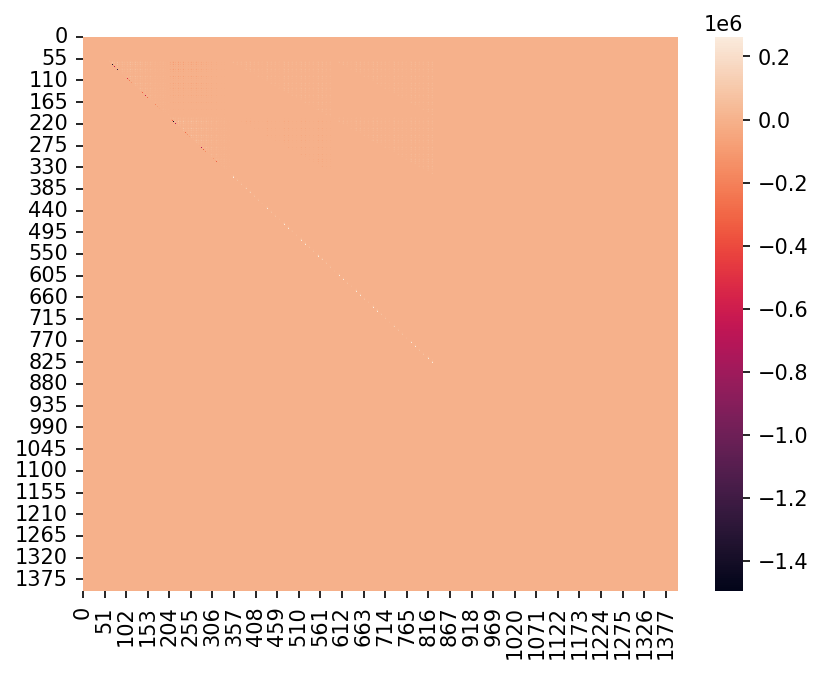

In [4]:
plt.figure(dpi=150)
sns.heatmap(Q)

## Print the minimum and maximum values of the Matrix


In [5]:
print(min(Q1.values(),key=abs))
print(max(Q1.values(),key=abs))

0.005
-1496130.5163878133


## Plot an interactive map of the qubo to see how each constraint affects the QUBO

in _interactive_heatmap_ use "high" to highlight the difference ad each step, "dif" to see the difference and all 0 value elements and "step" to see how the full matrix comes to be

In [9]:
maps=[]
for const in range(7):
    bqm, Q, offset, Q1=create_QUBO(T, K, P_k, A, B_a, Q_a, R_vend,R_acqu, Epf, Ecf, E_max, E0, Ek_min, g1, g2, g4,etac, etas, PaT, Pa0, Pvend, Pacqu, Pinc, costk,Eas_max, Eac_max, Ek_max, const=const);
    maps.append(Q)


In [12]:
def interactive_heatmap(n_step, maps, P_k, B_a, Q_a, R_vend, R_acqu, T, fun='step'):
    '''
    function to generate an heatmap with slider to see the evolution of an heatmap
    parameter:
    -   n_step: number of step for the slider
    -   
    '''
    import seaborn as sns
    from ipywidgets import interactive
    


    totP        = sum(sum(P_k))
    totB        = sum(B_a)
    totQ        = sum(Q_a)
    totR_vend   = sum(R_vend)
    totR_acqu   = sum(R_acqu)
    totInc      = T
    totPsik     = sum(sum(P_k))
    #pk and r depend on the timestep so they dont need to be multiplied by T
    n_var = int(totP + T*totB*2 + T*totQ*2 + totR_vend + totR_acqu+T)
    xc_zero     = totP   
    xs_zero     = xc_zero + T*totB
    xic_zero    = xs_zero + T*totB
    xis_zero    = xic_zero + T*totQ
    xvend_zero  = xis_zero + T*totQ
    xacqu_zero  = xvend_zero + totR_vend
    xiinc_zero  = xacqu_zero + totR_acqu
    psipk_zero  = xiinc_zero + totInc
    psis_zero = psipk_zero + totP
    psic_zero = psis_zero + T*totB


    def difference(a):
        if a == 0:
            return maps[a]
        else:
            return maps[a]-maps[a-1]
    
    def highlight(a):
        if a == 0:
            m = maps[a]
        else:
            m = maps[a]-maps[a-1]
        highlighted_matrix = m
        highlighted_matrix = np.where(highlighted_matrix!= 0, highlighted_matrix, np.nan)

        # Create a mask for the heatmap
        mask = np.isnan(highlighted_matrix)
        return m,mask

    def step(a):    
        return maps[a]

    f = {'dif':difference,
         'step':step,
         'high':highlight}
    
    def plot(a):

        z = f[fun](a)
        if fun == 'high':
            plt.figure(figsize=(30,26), dpi=80)
            ax=sns.heatmap(z[0], linewidth=0, mask=z[1])
        else:
            plt.figure(figsize=(15,12), dpi=80)
            ax=sns.heatmap(z, linewidth=0)
        ax.hlines([xc_zero, xs_zero, xic_zero, xis_zero, xvend_zero, xacqu_zero, xiinc_zero, psipk_zero, psis_zero, psic_zero] ,*ax.get_xlim()  )
        ax.vlines([xc_zero, xs_zero, xic_zero, xis_zero, xvend_zero ,xacqu_zero ,xiinc_zero, psipk_zero, psis_zero, psic_zero] ,*ax.get_ylim()  )
    return interactive(plot, a=(0,n_step,1))


interactive_heatmap(6,maps, P_k, B_a, Q_a, R_vend, R_acqu, T,'high')


interactive(children=(IntSlider(value=3, description='a', max=6), Output()), _dom_classes=('widget-interact',)…

## Create a sample to test the read_sample method 


In [10]:
import random

totP = sum(sum(P_k))
totB = sum(B_a)
totQ = sum(Q_a)
totR_vend = sum(R_vend)
totR_acqu = sum(R_acqu)

#pk and r depend on the timestep so they dont need to be multiplied by T
n_var = int(totP + T*totB*2 + T*totQ*2 + totR_vend + totR_acqu+T)


In [11]:
n_var

1059

In [2]:

sample = '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1'

In [3]:
sample=list(map(int, sample.split()))


In [5]:
read_sample(sample, 'dataset xml\S0_prosumer_test_240912.xml')

Interpratation of sample.

sample in question [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\forazi\AppData\Local\Temp\ipykernel_2932\1329735854.py:1: SyntaxWarning: invalid escape sequence '\S'
  read_sample(sample, 'dataset xml\S0_prosumer_test_240912.xml')


,gen0,c_acc0,s_acc0,E_vend,E_acqu,costo(t),ricavo(t)
0,0.0,0,0,0,1,172.97,0.00
1,0.0,0,0,0,1,167.90,0.00
2,0.0,0,0,0,1,166.29,0.00
3,0.0,0,0,0,1,167.20,0.00
4,0.0,0,0,0,1,166.29,0.00
5,0.0,0,0,1,1,174.50,99.50
6,0.0,0,0,1,1,183.96,108.96
7,0.0,0,0,1,1,195.00,121.60
8,0.0,0,0,3,1,214.20,442.64
9,0.0,0,0,3,1,205.39,486.93
